# Сборный проект

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Оглавление: 
1. [Шаг 1. Откроем файл с данными и изучим общую информацию](#step1)  
2. [Шаг 2. Преобразуем и обработаем данные](#step2)  
3. [Шаг 3. Проведем исследовательский анализ данных](#step3)
4. [Шаг 4. Исследовательский анализ данных. Портрет пользователя каждого региона](#step4)
5. [Шаг 5. Исследовательский анализ данных. Проверка гипотез](#step5)
6. [Шаг 6. Итоговый вывод](#step6)

### Шаг 1. Откроем файл с данными и изучим общую информацию. <a id="step1"></a> 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from copy import deepcopy

#user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/71.0.3578.98 Chrome/71.0.3578.98 Safari/537.36'
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36"

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.columns= data.columns.str.lower()
missed_date = {'Madden NFL 2004': '12 августа 2003 г.', 'FIFA Soccer 2004': '24 октября 2003 г.', 'LEGO Batman: The Videogame': '23 сентября 2008 г.', 'wwe Smackdown vs. Raw 2006': '11 ноября 2005 г.', 'Space Invaders': '1978 г.', 'Rock Band': '20 ноября 2007 г.', "Frogger's Adventures: Temple of the Frog": '21 ноября 2001 г.', 'LEGO Indiana Jones: The Original Adventures': '3 июня 2008 г.', 'Call of Duty 3': '7 ноября 2006 г.', 'Call of Duty: Black Ops': '9 ноября 2010 г.', 'Triple Play 99': '26 марта 1998 г.', 'Adventure': '1983', 'Combat': '1995', 'LEGO Harry Potter: Years 5-7': '11 ноября 2011 г.', 'NASCAR Thunder 2003': '19 сентября 2002 г.', 'Hitman 2: Silent Assassin': '1 октября 2002 г.', 'Legacy of Kain: Soul Reaver': '16 августа 1999 г.', 'Donkey Kong Land III': '27 октября 1997 г.', 'Air-Sea Battle': '14 октября 1977 г.', 'Suikoden III': '11 июля 2002 г.', 'Wheel of Fortune': 'January 6, 1975', 'Yakuza 4': '18 марта 2010 г.', 'Namco Museum': '2001', 'Rhythm Heaven': '31 июля 2008 г.', 'The Lord of the Rings: War in the North': '1 ноября 2011 г.', 'Madden NFL 07': '22 августа 2006 г.', 'MLB SlugFest 20-03': '23 июня 2002 г.', 'Shaun White Snowboarding': '13 ноября 2008 г.', 'PES 2009: Pro Evolution Soccer': '17 октября 2008 г.', 'WarioWare: Twisted!': '14 октября 2004 г.', 'Madden NFL 11': '6 августа 2010 г.', 'Test Drive Unlimited 2': '8 февраля 2011 г.', 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': '14 ноября 2005 г.', 'Monster Hunter 2': '16 февраля 2006 г.', 'Metal Gear Solid 2: Substance': '13 ноября 2001 г.', 'Advance Wars: Days of Ruin': '21 января 2008 г.', 'The Golden Compass': '30 ноября 2007 г.', 'Madden NFL 06': '8 августа 2005 г.', 'NASCAR: Dirt to Daytona': '11 ноября 2002 г.', 'Madden NFL 2002': '13 августа 2001 г.', 'Def Jam: Fight for NY': '1 сентября 2004 г.', 'NBA Street Vol. 2': '29 апреля 2003 г.', 'Fishing Derby': '1980 г.', 'Wet': '15 сентября 2009 г.', 'Sonic the Hedgehog': '7 марта 2013 г.', 'Tiger Woods PGA Tour 07': '21 сентября 2006 г.', 'Circus Atari': '1977 г.', 'The Chronicles of Riddick: Escape from Butcher Bay': '1 июня 2004 г.', "Maze Craze: A Game of Cops 'n Robbers": '1980', 'Silent Hill: Homecoming': '30 сентября 2008 г.', 'Super Breakout': '13 мая 1976 г.', "Robert Ludlum's The Bourne Conspiracy": '3 июня 2008 г.', 'NHL Slapshot': '7 сентября 2010 г.', 'TERA': '25 января 2011 г.', 'NFL GameDay 2003': '13 августа 2002 г.', 'Harvest Moon: Save the Homeland': '5 июля 2001 г.', 'Hangman': '1978', 'NBA Live 2003': '8 октября 2002 г.', "Cubix Robots for Everyone: Clash 'n' Bash": 'March 21, 2001', 'Tropico 4': '26 августа 2011 г.', 'Tomb Raider (2013)': '5 марта 2013 г.', 'Bejeweled 3': '7 декабря 2010 г.', 'Custom Robo': '1999', 'Final Fantasy XI': '16 мая 2002 г.', 'Singularity': '25 июня 2010 г.', 'Dragster': '1980', 'All-Star Baseball 2005': '23 марта 2004 г.', 'Star Wars Jedi Knight II: Jedi Outcast': '26 марта 2002 г.', 'Slot Machine': '1894', 'The Dukes of Hazzard II: Daisy Dukes It Out': '7 ноября 2000 г.', 'Harvest Moon: The Tale of Two Towns': '8 июля 2010 г.', 'Shrek the Third': '2 мая 2007 г.', 'Nicktoons: Battle for Volcano Island': '24 октября 2006 г.', 'Haven: Call of the King': '17 ноября 2002 г.', 'Unreal Championship 2: The Liandri Conflict': '18 апреля 2005 г.', 'Pac-Man Fever': 'январь 1982 г.', 'Indy 500': '1989', 'Disgaea 3: Absence of Detention': '31 января 2008 г.', 'Flag Capture': '1992', 'Gun': '5 ноября 2005 г.', 'Rock Revolution': '15 октября 2008 г.', 'College Hoops 2K6': '21 ноября 2005 г.', 'Jonah Lomu Rugby Challenge': '26 августа 2011 г.', 'Mega Man X Collection': '10 января 2006 г.', 'BioShock 2': '9 февраля 2010 г.', 'Danganronpa: Trigger Happy Havoc': '21 мая 2020 г.', 'Jet X20': '28 октября 2002 г.', "Tony Hawk's Downhill Jam": '24 октября 2006 г.', 'Tribes: Aerial Assault': '23 сентября 2002 г.', 'Big Beach Sports 2': '6 июля 2010 г.', 'Yu Yu Hakusho: Dark Tournament': '21 сентября 2004 г.', 'Ghostbusters II': '1989 г.', 'Breakaway IV': '1978', 'Robotech: Battlecry': '25 сентября 2002 г.', 'Valkyria Chronicles III: Unrecorded Chronicles': '27 января 2011 г.', 'DanceDanceRevolution II': '11 октября 2011 г.', 'WRC: FIA World Rally Championship': '5 сентября 2019 г.', 'Famista 64': '28 ноября 1997 г.', 'Dead Space 3': '5 февраля 2013 г.', 'Pet Zombies': '18 октября 2011 г.', 'Star Trek: Legacy': '5 декабря 2006 г.', 'Backbreaker': '29 сентября 2009 г.', 'Twisted Metal: Small Brawl': '26 ноября 2001 г.', 'Otomedius Excellent': '21 апреля 2011 г.', 'NBA Starting Five': '9 октября 2002 г.', 'Teen Titans': '2006', 'Trauma Team': '18 мая 2010 г.', "James Cameron's Dark Angel": '18 ноября 2002 г.', 'Sword of the Samurai': '1989 г.', 'Splatterhouse': 'ноябрь 1988 г.', 'Alone in the Dark: The New Nightmare': '18 мая 2001 г.', 'Jurassic Park: The Game': '15 ноября 2011 г.', 'eJay Clubworld': '1997', 'Our House Party!': '2009 г.', 'WCW Backstage Assault': '8 ноября 2000 г.', "Disney's Cinderella: Magical Dreams": 'September 20, 2005', 'Transworld Surf': '14 ноября 2001 г.', 'Street Fighter IV': '2008', 'Nintendo Puzzle Collection': '7 февраля 2003 г.', 'Charm Girls Club: My Fashion Mall': '20 октября 2009 г.', 'Record of Agarest War Zero': '25 июня 2009 г.', 'Rocksmith': '18 октября 2011 г.', 'Saru! Get You! Million Monkeys': '13 июля 2006 г.', 'Street Hoops': '12 августа 2002 г.', 'Godzilla: Destroy All Monsters Melee': '6 октября 2002 г.', 'The Daring Game for Girls': 'October 2009', 'Major League Baseball 2K6': '3 апреля 2006 г.', 'Star Trek: Conquest': '20 ноября 2007 г.', 'GiFTPiA': '2 мая 2003 г.', 'Happy Feet Two': 'November 8, 2011', "Disney's Chicken Little: Ace In Action": '9 ноября 2006 г.', 'Atsumare! Power Pro Kun no DS Koushien': '3 августа 2006 г.', 'Egg Monster Hero': '24 марта 2005 г.', 'Demon Chaos': '24 ноября 2005 г.', 'Samurai Shodown Anthology': '24 июля 2008 г.', 'Action Man-Operation Extreme': 'November 8 2000', 'Super Puzzle Fighter II': '31 мая 1996 г.', 'Charm Girls Club: My Fashion Show': '20 октября 2009 г.', 'Face Racers: Photo Finish': '4 октября 2011 г.', 'Zero: Tsukihami no Kamen': '31 июля 2008 г.', 'Get Fit with Mel B': '20 октября 2010 г.', 'Mega Man Battle Network: Operation Shooting Star': '12 ноября 2009 г.', 'Smashing Drive': '2000 г.', 'Port Royale 3': '4 мая 2012 г.', 'Dream Trigger 3D': '10 мая 2011 г.', 'Dead Island: Riptide': '6 сентября 2011 г.', 'Yoostar on MTV': '15 ноября 2011 г.', 'Tornado': '1993', "McFarlane's Evil Prophecy": '15 июня 2004 г.', 'Drake of the 99 Dragons': '3 ноября 2003 г.', 'Build-A-Bear Workshop: Friendship Valley': '2010', 'Rayman Arena': '30 ноября 2001 г.', 'National Geographic Challenge!': '22 ноября 2011 г.', 'Alex Rider: Stormbreaker': '7 июля 2006 г.', 'Chou Soujuu Mecha MG': '2 сентября 2006 г.', 'Combat Elite: WWII Paratroopers': '21 ноября 2005 г.', "Flip's Twisted World": '19 октября 2010 г.', 'Mobile Ops: The One Year War': '26 июня 2008 г.', "Tom Clancy's Rainbow Six: Critical Hour": '14 марта 2006 г.', 'Jewel Link Chronicles: Mountains of Madness': '8 февраля 2012 г.', 'Captain America: Super Soldier': '15 июля 2011 г.', 'Mountain Bike Adrenaline': '9 октября 2007 г.', 'Drill Dozer': '22 сентября 2005 г.', 'GRID': '30 мая 2008 г.', 'Tour de France 2011': '23 июня 2011 г.', 'Reader Rabbit 2nd Grade': '1999 г.', 'Monster Hunter Frontier Online': '21 июня 2007 г.', 'RollerCoaster Tycoon': '31 марта 1999 г.', 'Battle vs. Chess': '17 мая 2011 г.', 'The History Channel: Great Battles - Medieval': '6 мая 2011 г.', 'B.L.U.E.: Legend of Water': '9 июля 1998 г.', 'NHL Hitz Pro': '25 сентября 2003 г.', "Luxor: Pharaoh's Challenge": '20 ноября 2007 г.', 'Sega Rally 2006': '12 января 2006 г.', 'Half-Minute Hero 2': 'August 4, 2011', 'Major League Baseball 2K8': '4 марта 2008 г.', 'Sabre Wulf': 'июль 1984 г.', 'Swords': 'May 15, 2009', 'Beyond the Labyrinth': '19 января 2012 г.', 'Bikkuriman Daijiten': 'August 2007', 'Majesty 2: The Fantasy Kingdom Sim': '11 сентября 2009 г.', 'Fullmetal Alchemist: Brotherhood': '5, 2009', 'Samurai Spirits: Tenkaichi Kenkakuden': '2006', 'World of Tanks': '12 августа 2010 г.', 'Tom and Jerry in War of the Whiskers': '18 ноября 2002 г.', 'Super Duper Sumos': '2002', 'The King of Fighters: Maximum Impact - Maniax': '12 августа 2004 г.', 'Combat Wings: The Great Battles of WWII': '27 марта 2012 г.', 'Tube Slider': '17 апреля 2003 г.', 'Saint': '29 августа 2006 г.', 'Steal Princess': '29 июля 2008 г.', 'Mario Tennis': '21 июля 2000 г.', 'Runaway: A Twist of Fate': '26 ноября 2009 г.', "Cabela's Alaskan Adventure": '9 сентября 2006 г.', 'Virtua Quest': '26 августа 2004 г.', "Shonen Jump's Yu-Gi-Oh! GX Card Almanac": '2007 November 28, 2007', 'Without Warning': '28 октября 2005 г.', 'PDC World Championship Darts 2008': '25 января 2008 г.', 'Dinotopia: The Sunstone Odyssey': '23 июля 2003 г.', 'Jet Impulse': '8 февраля 2007 г.', "Dance! It's Your Stage": 'September 30, 2011', 'Football Manager 2007': '18 октября 2006 г.', 'Ferrari: The Race Experience': '6 октября 2010 г.', 'Aquaman: Battle for Atlantis': '23 июля 2003 г.', 'Homeworld Remastered Collection': '28 сентября 1999 г.', 'AKB1/48: Idol to Guam de Koishitara...': 'October 6, 2011', 'Brothers in Arms: Furious 4': '2011', 'Agarest Senki: Re-appearance': 'November 27, 2008', 'Freaky Flyers': '4 августа 2003 г.', 'Inversion': '5 июня 2012 г.', 'Hakuouki: Shinsengumi Kitan': 'September 2008'}

In [3]:
display(data.head())
print()
print(data.info())
print()
print(data.isnull().sum())
print()
display(data.describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64



,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод:
Я загрузила таблицу с данными по продаже компьютерных игр для разных платформ с 1980 по 2016 годы. Датасет состоит из 16715 строк и 11 колонок. Часть данных пропущена. Тип колонок year_of_release и critic_score нужно будет поменять.

### Шаг 2. Преобразуем и обработаем данные. <a id="step2"></a> 

In [4]:
print(data.duplicated().sum())
#data = data.drop_duplicates().reset_index(drop=True)

display(data.query('name!=name'))
data = data.query('name==name')

print("Количество значений tbd:", len(data.query('user_score == "tbd"')))
display(data.query('user_score == "tbd"').head())

0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Количество значений tbd: 2424


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [5]:
# разберемся со столбцом year_of_release (часть данных удалось спарсить и соханить в missed_date)
import warnings
warnings.filterwarnings('ignore')


data = data.reset_index()

for key in missed_date:
    if missed_date[key][-1::].isdigit():
        missed_date[key] = missed_date[key][-4::]
    else:
        missed_date[key] = missed_date[key][-7:-3:]
#for key in missed_date:
#    if missed_date[key][1]=='8':
#        missed_date[key]==0  

for i in range(len(data)):
    if data['year_of_release'][i] != data['year_of_release'][i]:
        if data['name'][i] in missed_date:
            data['year_of_release'][i]=missed_date[data['name'][i]]

data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')

for i in range(len(data)):
    if data['year_of_release'][i] <1970 or data['year_of_release'][i]>2017:
        data['year_of_release'][i]=0

display(data.head(10))

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


ниже код, который я использовала, чтобы спарсить дату выхода игры. далось спарсить большую часть дат. Т.к. код работает очень долго, чтобы удобнее было проверять, я провто скопировала данные в переменную missed_date.

data_year = data.query('year_of_release!=year_of_release')
data_year = data_year.reset_index()
missed_date = {}
for i in range(len(data_year)):
    time.sleep(7)
    game = data_year['name'][i]
    link = 'game '+ game + ' year of release'
    link = link.replace(' ', '+')
    url = f"https://google.com/search?q={link}"
    headers = {"user-agent" : user_agent}
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text)
    dates = soup.find('div', {'class':'Z0LcW'})
    if dates: 
        missed_date[game] = dates.get_text()
    else:
        dates = soup.find('div', {'class':'Z0LcW XcVN5d AZCkJd'})
        if dates:
            missed_date[game] = dates.get_text()
        else:
            continue
            
            
print(len(data_year))
print(len(missed_date))
print(missed_date)

In [6]:
#посмотрим столбцы user_score и critic_score
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype('int')

In [7]:
# добавим столбец суммарные продажи во всех регионах
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [8]:
#обработаем столбец rating
data['rating'] = data['rating'].fillna('unknown')

### Вывод:
Дубликатов в данных нет. 2 строчки, где отсутствует название игры и жанр я удалила, т.к. непредставляется возможным заполнить данные по этим строкам и их очень мало. Посмотрела значение "tbd" в колонке user_score. Скорее всего данное значение означает либо отсутствие, либо недостаточное количество оценок. Пропущенные значения в колонкам user_score и critic_score, а также значение "tbd" я заменила на -1. После заполнения столбца user_score, я преобразовала его в числовой тип, а critic_score привела к целочисленному типу.
Часть пропущенных данных, в какой год была выпущена игра удалось найти в интернете. оставжиеся пропущенные данные по годам я заполнила нулями. Также я добавила колонку all_sales, в которой отобразила суммарные продажи по каждой игре. В колонке rating я заменила пропуски на "unknown", т.к. нет возвожности заполнить пропуски достоверными значениями.

### Шаг 3. Проведем исследовательский анализ данных. <a id="step3"></a> 

2008    1453
2009    1440
2010    1273
2007    1211
2011    1176
Name: year_of_release, dtype: int64



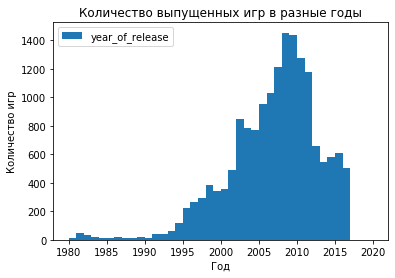

In [9]:
#сколько игр выпускалось в разные годы
data_exc_0 = data.query('year_of_release !=0')

print(data_exc_0['year_of_release'].value_counts().head())
print()

data_exc_0.plot(kind = 'hist', y = 'year_of_release', bins=40, range = (1980, 2020))
plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [10]:
#как менялись продажи по платформам
data_platform = data_exc_0.groupby('platform').agg({'all_sales':'sum'})
data_platform = data_platform.sort_values(by = 'all_sales', ascending = False)
print(data_platform.head(10))
data_platform = data_platform.reset_index()
platform_list = data_platform['platform'].iloc[0:6].tolist()

          all_sales
platform           
PS2         1255.77
X360         971.30
PS3          939.23
Wii          906.96
DS           805.82
PS           730.86
GBA          317.57
PS4          314.14
PSP          293.61
PC           259.47


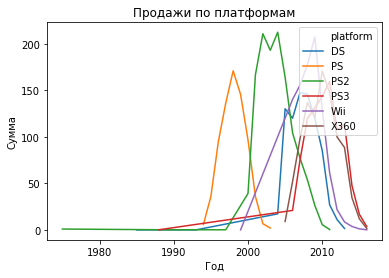

In [11]:
data_platform = data_exc_0.query('platform in @platform_list')
data_platform = data_platform.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
data_platform = data_platform.reset_index()

sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=data_platform)
plt.title('Продажи по платформам')
plt.legend(loc='upper right')
plt.ylabel('Сумма')
plt.xlabel('Год')
sns.set(rc={'figure.figsize':(9, 3)})
plt.show()

In [12]:
print(data_platform.query('platform == "PS2"').sort_values(by = "year_of_release"))

   platform  year_of_release  all_sales
22      PS2             1975       0.95
23      PS2             1989       0.17
24      PS2             1997       0.15
25      PS2             2000      39.17
26      PS2             2001     166.82
27      PS2             2002     210.80
28      PS2             2003     193.05
29      PS2             2004     212.43
30      PS2             2005     164.06
31      PS2             2006     104.50
32      PS2             2007      77.28
33      PS2             2008      53.90
34      PS2             2009      26.40
35      PS2             2010       5.64
36      PS2             2011       0.45


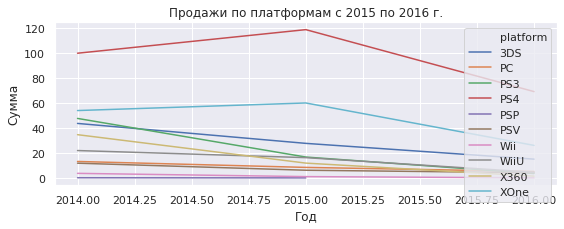


Топ-5 платформ по продажам за 2016 год

   platform  year_of_release  all_sales
11      PS4             2016      69.25
28     XOne             2016      26.15
2       3DS             2016      15.14
5        PC             2016       5.25
22     WiiU             2016       4.60


In [13]:
#по графику видно, что время жизни платформы около 10 лет, с пиком в 5-6 лет.
data_10 = data_exc_0.query('year_of_release >2013')

data_10_platform = data_10.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
data_10_platform = data_10_platform.reset_index()

sns.lineplot(x='year_of_release', y='all_sales', hue='platform', data=data_10_platform)
plt.title('Продажи по платформам с 2015 по 2016 г.')
plt.legend(loc='upper right')
plt.ylabel('Сумма')
plt.xlabel('Год')
sns.set(rc={'figure.figsize':(20, 5)})
plt.show()


data_10_platform = data_10_platform.query('year_of_release >2015')
print()
print("Топ-5 платформ по продажам за 2016 год")
print()
print(data_10_platform.sort_values(by= 'all_sales', ascending = False).head(5))

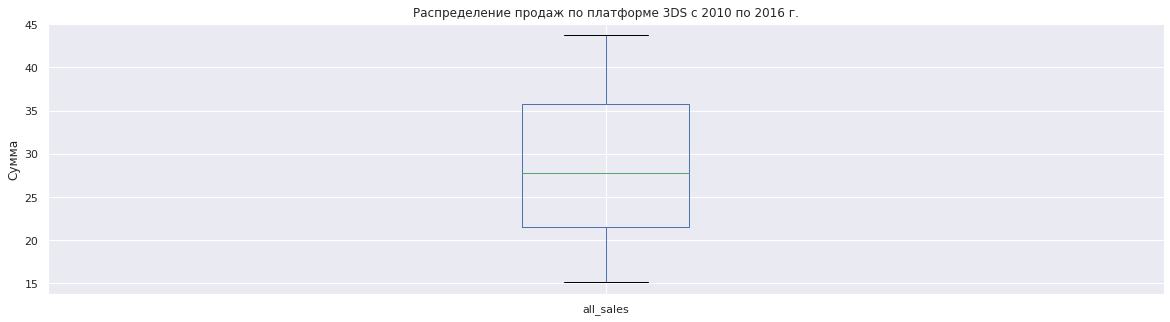

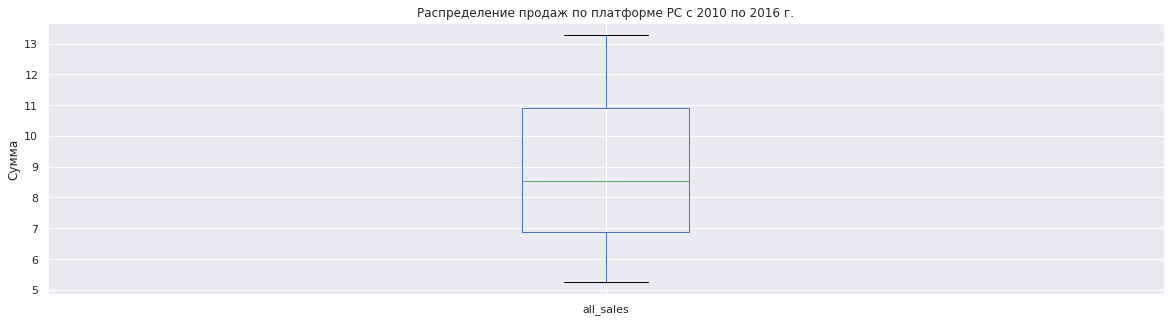

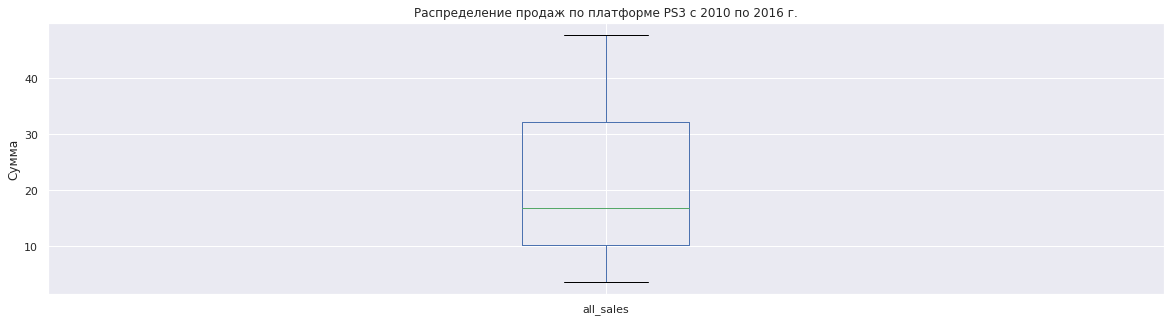

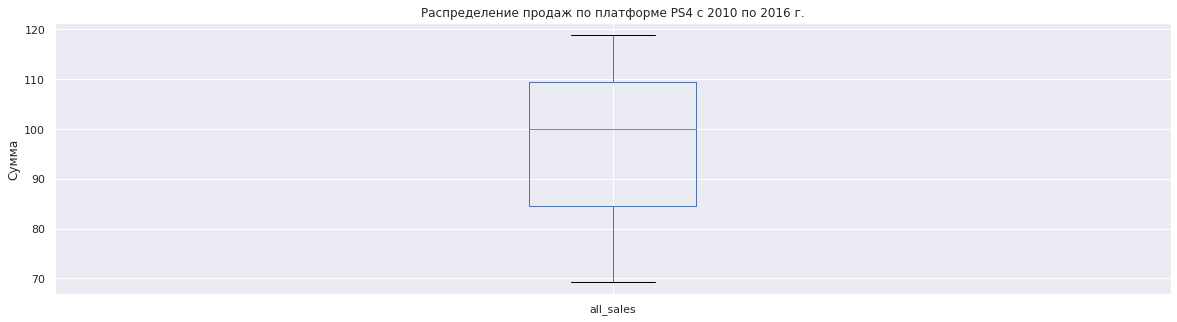

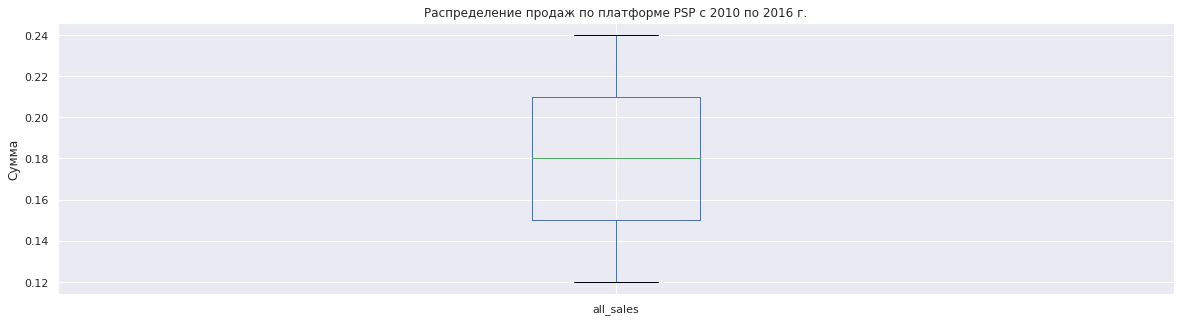

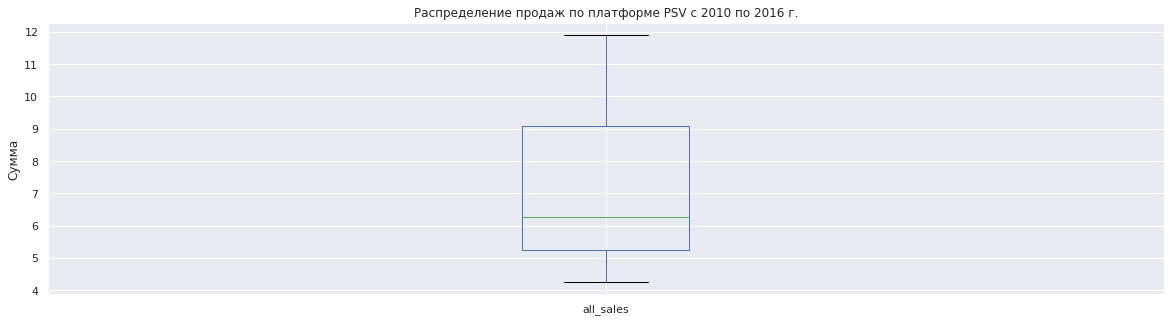

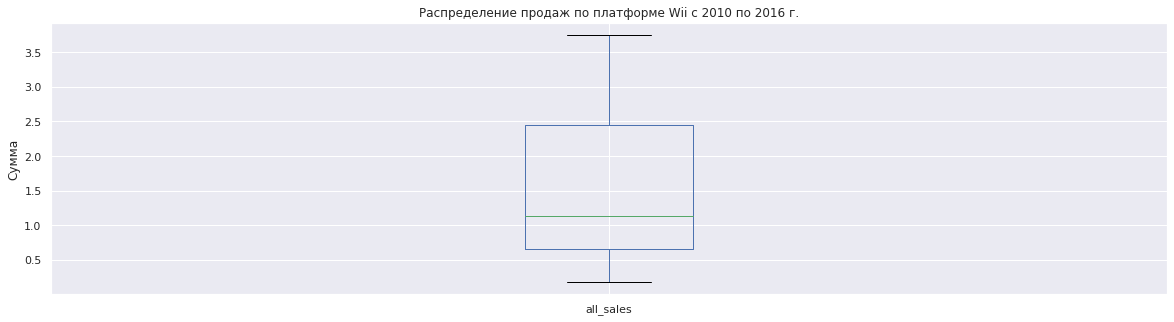

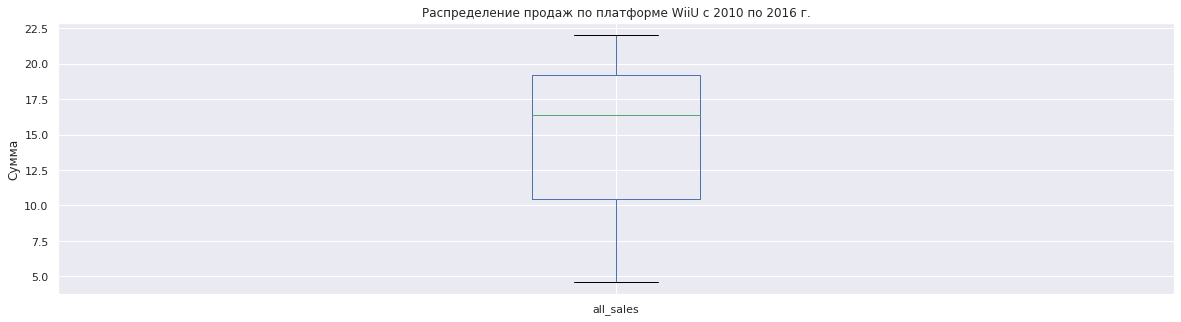

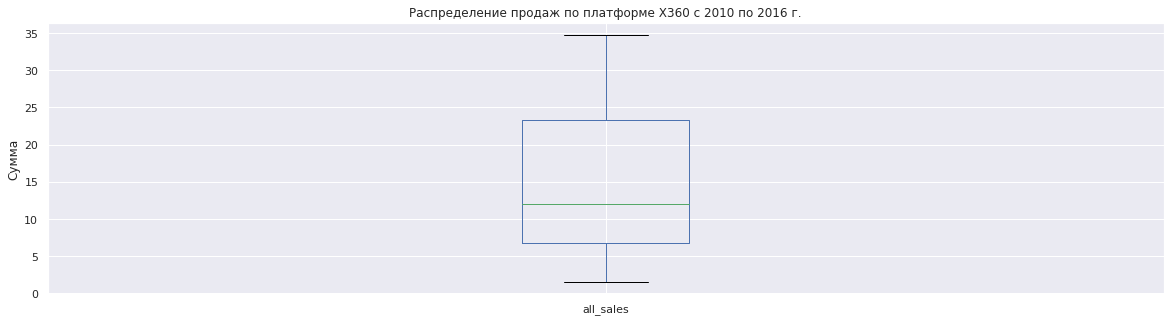

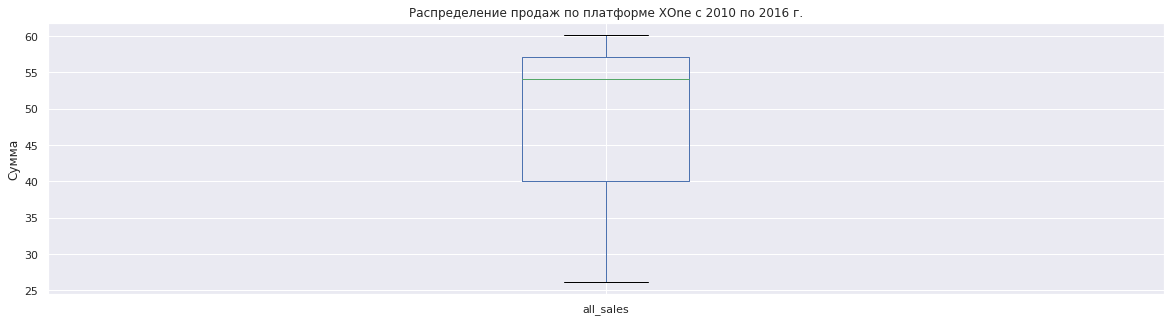

In [14]:
data_10_platform = data_10.pivot_table(index = ['platform', 'year_of_release'], values = 'all_sales', aggfunc = 'sum')
data_10_platform = data_10_platform.reset_index()
list_plat = data_10_platform['platform'].unique().tolist()
for i in list_plat:
    d = data_10_platform.query('platform == @i')
    del d['year_of_release']
    d.boxplot()
    plt.title('Распределение продаж по платформе ' + i +' с 2010 по 2016 г.')
    plt.ylabel('Сумма')
    plt.show()

In [15]:
#посчитаем корреляцию между отзывами и продажами одной популярной платформы.
#сперва выберим платформу
data_10_platform = data_10.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
print(data_10_platform.sort_values(by = 'all_sales', ascending  =False).head())

          all_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22


Корреляцию между отзывами критиков и продажами: 0.3537932925931926
Корреляцию между отзывами пользователей и продажами: 0.27266935596955694


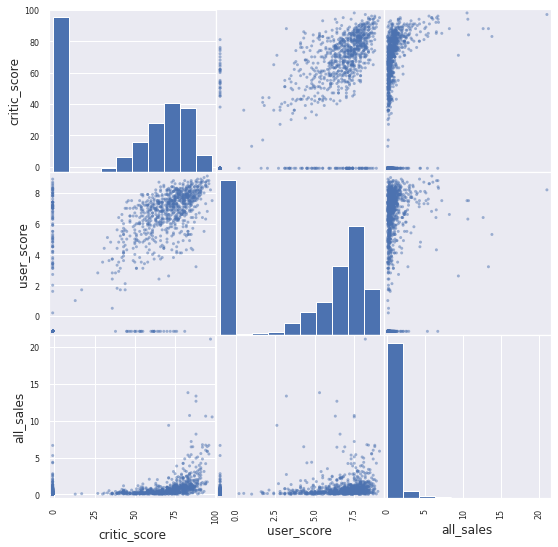

In [16]:
data_PS3 = deepcopy(data.query('platform == "PS3"'))
data_PS3.drop(['index', 'name', 'platform', 'year_of_release', 'genre', 'rating', 'na_sales','eu_sales', 'jp_sales', 'other_sales'],
              axis='columns', inplace=True)
print("Корреляцию между отзывами критиков и продажами:", data_PS3['all_sales'].corr(data_PS3['critic_score']))
print("Корреляцию между отзывами пользователей и продажами:", data_PS3['all_sales'].corr(data_PS3['user_score']))
pd.plotting.scatter_matrix(data_PS3, figsize=(9,9))
plt.show()

Корреляцию между отзывами критиков и продажами: 0.19496633017474752
Корреляцию между отзывами пользователей и продажами: 0.17783286762982412


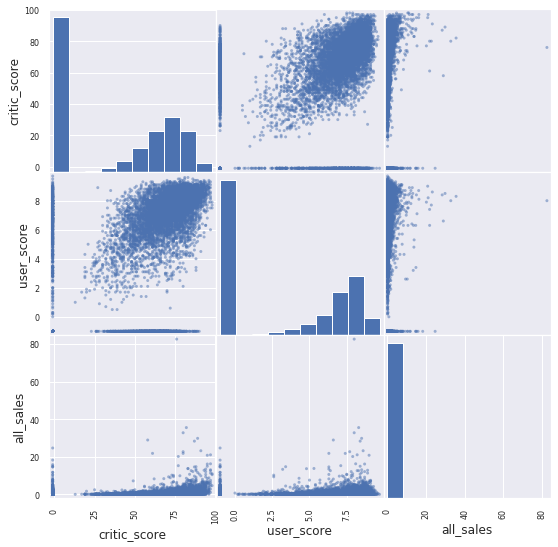

In [17]:
data_all_games = deepcopy(data)
data_all_games = data_all_games.query('year_of_release >=2000')
data_all_games.drop(['index', 'name', 'platform', 'year_of_release', 'genre', 'rating', 'na_sales','eu_sales', 'jp_sales', 'other_sales'],axis='columns', inplace=True)
print("Корреляцию между отзывами критиков и продажами:", data_all_games['all_sales'].corr(data_all_games['critic_score']))
print("Корреляцию между отзывами пользователей и продажами:", data_all_games['all_sales'].corr(data_all_games['user_score']))
pd.plotting.scatter_matrix(data_all_games, figsize=(9,9))
plt.show()

Всего жанров:  12
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: genre, dtype: int64


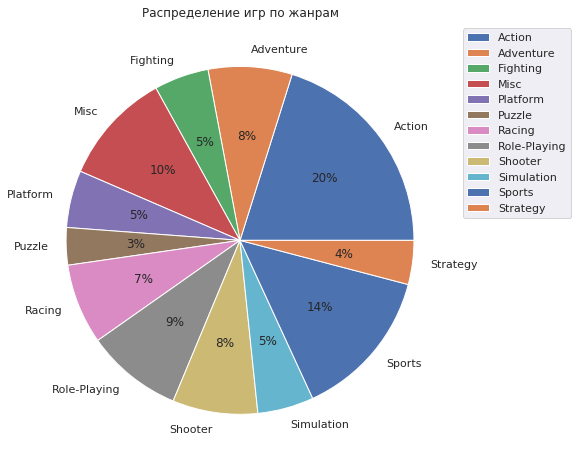

In [18]:
#распределение игр по жанрам
print("Всего жанров: ", len(data['genre'].unique()))
print(data['genre'].value_counts().head(5))
data_genre = data.pivot_table(index = 'genre', values = 'index', aggfunc = 'count')

data_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Распределение игр по жанрам")
plt.ylabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

              all_sales
genre                  
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77


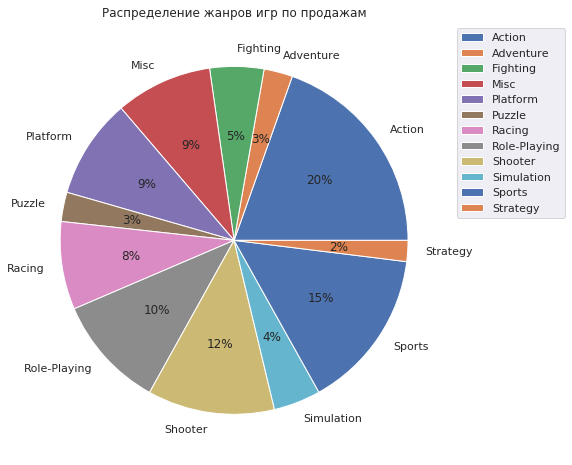

In [19]:
# самые прибыльные жанры
data_genre = data.pivot_table(index = 'genre', values = 'all_sales', aggfunc = 'sum')
print(data_genre.sort_values(by='all_sales', ascending = False).head(5))

data_genre.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.f%%')
plt.title("Распределение жанров игр по продажам")
plt.ylabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

### Вывод:
Наибольшее количество игр выпустили в 2008 и 2009 годах. По каждой платформе были свои продажи, выбрав 6 наиболее прибыльных платформ PS2 (1255.77), X360 (971.30), PS3 (939.23), Wii  (906.96), DS (805.82), PS (730.86), я построила распределение продаж по годам. По графику видно, что время жизни платформы около 10 лет, с пиком в 5-6 лет.
Далее проанализировав данные с 2010 по 2016 года, можно выделить 2 потенциально наиболее прибыльные платформы на 2017 год: PS4 и XOne.
Также я построила "ящик с усами" для платформ, по которым были продажи за период с 2010 по 2016 года. Этих платформ оказалось 12: '3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'. По графикам видно, что есть небольшие смещения медианы, но в целом графики подтверждают нормальное распределение продаж по годам по платформам. 
Для того, чтобы выяснить как вылияют на продажи отзывы критиков и пользоваетелей, я выбрала платформу с наибольшими показателями по продажам за период 2010-2016 - PS3. Для анализа мной посчитан коэффициэнт корреляции и построена диаграмма рассеяния. Коэффициет корелляции показывает небольшую зависимость между отзывами критиков и продажами: 0.35, а отзывы пользователей на продажи влияют меньше: 0.27. По диаграмме также видна зависимость, чем лучше отзывы, в особенности критиков, тем больше продаж. Это выглядит логичным и анализ по данным за 2000-2016 года показывает, что данную зависимость мы можем перенести на все игры.
Наиболее популярными жанрами игр являются Action и Sports, занимая 20% и 14% игр соответветственно. Наибольшую прибыль принесли также эти 2 жанра Action 1744.17 млн проданых копий, что сответствует 20% рынка и Sports 1331.27 млн проданых копий, что соответствует 15% рынка. К жанрам с высокими продажами кроме Action и Sports можно добавить Shooter, Role-Playing, Platform и Misc. А самые низкие продажи у жанров Strategy, Puzzle, Adventure, Simulation примерно по 3% от общего рынка.

### Шаг 4. Исследовательский анализ данных. Портрет пользователя каждого региона. <a id="step4"></a> 

In [20]:
data_user = data.pivot_table(index=['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
#data_user = data_user.reset_index()
data_user_for_diagram = deepcopy(data_user)
display(data_user_for_diagram.head())

,eu_sales,jp_sales,na_sales
platform,,,
2600,5.47,0.00,90.60
3DO,0.00,0.10,0.00
3DS,61.48,100.67,83.49
DC,1.69,8.56,5.43
DS,188.89,175.57,382.40


Данные по колонке na_sales

   platform  eu_sales  jp_sales  na_sales
28     X360    270.76     12.43    602.47
16      PS2    339.29    139.20    583.84
26      Wii    262.21     69.33    496.90
17      PS3    330.29     80.19    393.49
4        DS    188.89    175.57    382.40



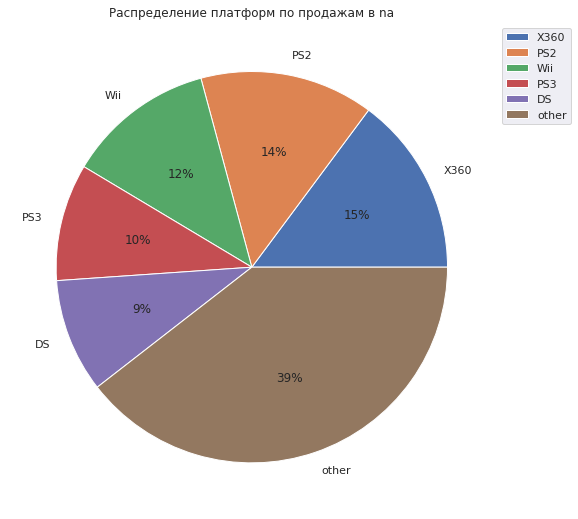

Данные по колонке eu_sales

   platform  eu_sales  jp_sales  na_sales
16      PS2    339.29    139.20    583.84
17      PS3    330.29     80.19    393.49
28     X360    270.76     12.43    602.47
26      Wii    262.21     69.33    496.90
15       PS    213.61    139.82    336.52



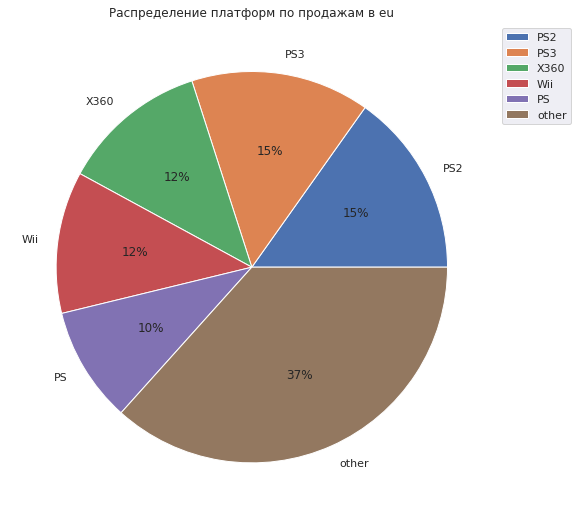

Данные по колонке jp_sales

   platform  eu_sales  jp_sales  na_sales
4        DS    188.89    175.57    382.40
15       PS    213.61    139.82    336.52
16      PS2    339.29    139.20    583.84
23     SNES     19.04    116.55     61.23
2       3DS     61.48    100.67     83.49



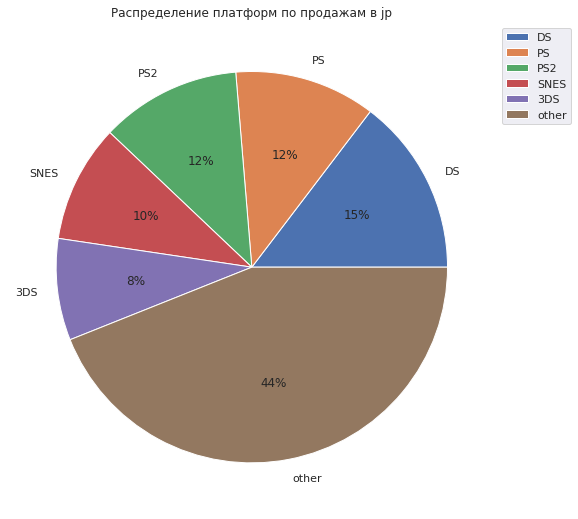

Данные по колонке na_sales

       genre  eu_sales  jp_sales  na_sales
0     Action    519.13    161.43    879.01
10    Sports    376.79    135.54    684.43
8    Shooter    317.34     38.76    592.24
4   Platform    200.35    130.83    445.50
3       Misc    212.74    108.11    407.27

Данные по колонке eu_sales

      genre  eu_sales  jp_sales  na_sales
0    Action    519.13    161.43    879.01
10   Sports    376.79    135.54    684.43
8   Shooter    317.34     38.76    592.24
6    Racing    236.51     56.71    359.35
3      Misc    212.74    108.11    407.27

Данные по колонке jp_sales

           genre  eu_sales  jp_sales  na_sales
7   Role-Playing    188.71    355.41    330.81
0         Action    519.13    161.43    879.01
10        Sports    376.79    135.54    684.43
4       Platform    200.35    130.83    445.50
3           Misc    212.74    108.11    407.27

Данные по колонке na_sales

    rating  eu_sales  jp_sales  na_sales
1        E    710.25    198.11   1292.99
8  unknown 

In [21]:
data_user = data.pivot_table(index=['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_user = data_user.reset_index()

def sort_data(data, param):
    print("Данные по колонке", param)
    print()
    print(data.sort_values(by = param, ascending = False).head(5))
    print()

def pie_diarg(data, param):
    data_user_for_diagram = data.pivot_table(index=['platform'], values = param, aggfunc = 'sum')
    data_user_for_diagram = data_user_for_diagram.sort_values(by=param, ascending=False)
    a = data_user_for_diagram.iloc[6::]
    a = a[param].sum()
    data_user_for_diagram =data_user_for_diagram.iloc[0:5:]
    data_user_for_diagram.loc['other'] = a
    data_user_for_diagram.plot(kind='pie', subplots=True, figsize=(9, 9), autopct='%1.f%%')
    plt.title("Распределение платформ по продажам в "+param[0:2])
    plt.ylabel("")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()
    
sort_data(data_user, 'na_sales')
pie_diarg(data, 'na_sales')
sort_data(data_user, 'eu_sales')
pie_diarg(data, 'eu_sales')
sort_data(data_user, 'jp_sales')
pie_diarg(data, 'jp_sales')


data_user = data.pivot_table(index=['genre'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_user = data_user.reset_index()

sort_data(data_user, 'na_sales')
sort_data(data_user, 'eu_sales')
sort_data(data_user, 'jp_sales')

data_user = data.query('rating==rating')
data_user = data_user.pivot_table(index=['rating'], values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')
data_user = data_user.reset_index()

sort_data(data_user, 'na_sales')
sort_data(data_user, 'eu_sales')
sort_data(data_user, 'jp_sales') 

### Вывод:
Топ-5 самых популярных платформ в Сверной Америке (с кол-вом продаж копий в млн):
X360   602.47
PS2    583.84
Wii    496.90
PS3    393.49
DS     382.40
Топ-5 самых популярных платформ в Японии (с кол-вом продаж копий в млн):
DS     175.57 
PS     139.82  
PS2    139.20  
SNES   116.55   
3DS    100.67
Топ-5 самых популярных платформ в Европе (с кол-вом продаж копий в млн):
PS2    339.29    
PS3    330.29     
X360   270.76 
Wii    262.21    
PS     213.61

Топ-5 самых популярных жанров в Сверной Америке (с кол-вом продаж копий в млн):
Action    879.01
Sports    684.43
Shooter   592.24
Platform  445.50
Misc      407.27
Топ-5 самых популярных жанров в Японии (с кол-вом продаж копий в млн):
Role-Playing 355.41    
Action       161.43  
Sports       135.54  
Platform     130.83  
Misc         108.11
Топ-5 самых популярных жанров в Европе (с кол-вом продаж копий в млн):
Action    519.13    
Sports    376.79   
Shooter   317.34     
Racing    236.51     
Misc      212.74

В Северной Америке и Европе занимает первое место рейтинг E по шкале ESRB, а в Японии первое место занимает рейтинг со значением "unknown", причем с большим отрывом (в 4 раза), видимо в Японии своя градация.

В итоге мы получаем следующий потрет пользователя Северной Америки: это пользователь в основном играющий в Action или Sport игры с рейтингом E на пратформе X360 или PS2. Для Японии характерен пользователь играющий в Role-Playing с своим местным рейтингом на пратформе DS. Для Европы характерен пользователь играющий в Action с рейтингом E на пратформе PS2 или PS3. 

### Шаг 5. Исследовательский анализ данных. Проверка гипотез. <a id="step5"></a> 

In [22]:
#проверяем гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Н_о - средняя рейтинги равна
data_xbox = data.query('platform == "XOne" and user_score!=-1')
data_pc = data.query('platform == "PC" and user_score!=-1')

var_xbox = np.var(data_xbox['user_score'])
var_pc =  np.var(data_pc['user_score'])
print(var_xbox)
print(var_pc)

alpha = 0.05
results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'], equal_var =False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    if (data_xbox['user_score'].mean() < data_pc['user_score'].mean()):
        print('Cредний пользовательский рейтинг платформы PC больше, чем средний пользовательский рейтинг платформы Xbox One')
    else:
        print('Cредний пользовательский рейтинг платформы Xbox One больше, чем средний пользовательский рейтинг платформы PC')
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


1.8965188383045526
2.3377471580367684
p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу
Cредний пользовательский рейтинг платформы PC больше, чем средний пользовательский рейтинг платформы Xbox One


In [23]:
# проверяем гипотезу: средние пользовательские рейтинги жанров Action и Sports разные. Н_о - средняя рейтинги равна
data_action = data.query('genre == "Action" and user_score!=-1')
data_sport = data.query('genre == "Sports" and user_score!=-1')

var_action = np.var(data_action['user_score'])
var_sport =  np.var(data_sport['user_score'])
print(var_action)
print(var_sport)

alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sport['user_score'], equal_var =False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    if (data_action['user_score'].mean() < data_sport['user_score'].mean()):
        print('Cредний пользовательский рейтинг жанра Action больше, чем средний пользовательский рейтинг жанра Sport')
    else:
        print('Cредний пользовательский рейтинг жанра Sport больше, чем средний пользовательский рейтинг жанра Action')
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

2.03063665382663
2.594160671177017
p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


### Вывод:
Проверила гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, приняв за H0: средние пользовательские рейтинги платформ Xbox One и PC равны, и за H1: средние пользовательские рейтинги платформ Xbox One и PC различны. Я отвергла нулевую гипотезу, а именно, то что среднии пользовательского рейтинга равны. Средний пользовательский рейтинг платформы PC больше, чем средний пользовательский рейтинг платформы Xbox One.
Проверила гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные, приняв за H0: средние пользовательские рейтинги жанров Action и Sports равны, и за H1: средние пользовательские рейтинги жанров Action и Sports различны. После анализа не получилось отвергнуть нулевую гипотезу, а именно, то что среднии пользовательского рейтинга равны, т.е. средний пользовательский рейтинг жанра Sport может быть равен среднему пользовательскому рейтингу жанра Action.

### Шаг 6. Итоговый вывод. <a id="step6"></a> 

Я загрузила таблицу с данными по продаже компьютерных игр для разных платформ с 1980 по 2016 годы. Датасет состоит из 16715 строк и 11 колонок. Дубликатов в данных не было. Часть данных была пропущена. 2 строчки, где отсутствует название игры и жанр я удалила, т.к. непредставляется возможным заполнить данные по этим строкам и их очень мало. Посмотрела значение "tbd" в колонке user_score. Скорее всего данное значение означает либо отсутствие, либо недостаточное количество оценок. Пропущенные значения в колонкам user_score и critic_score, а также значение "tbd" я заменила на -1. После заполнения столбца user_score, я преобразовала его в числовой тип, а critic_score привела к целочисленному типу. Часть пропущенных данных, в колонке "year_of_release" удалось найти в интернете. Оставшиеся пропущенные данные по годам я заполнила нулями. Данные в колоноке year_of_release я перевела в числовой формат. В колонке rating я заменила пропуски на "unknown", т.к. нет возвожности заполнить пропуски достоверными значениями. Также я добавила колонку all_sales, в которой отобразила суммарные продажи по каждой игре. 

Проведя анализ на основе предобработанных данных, можно сказать, что наибольшее количество игр выпустили в 2008 и 2009 годах. По каждой платформе были разные продажи, выбрав 6 наиболее прибыльных платформ PS2 (1255.77 млн копий), X360 (971.30), PS3 (939.23), Wii  (906.96), DS (805.82), PS (730.86), я построила распределение продаж по годам. По графику видно, что время жизни платформы около 10 лет, с пиком в 5-6 лет.
Отдельно проанализировав данные с 2010 по 2016 года, можно выделить 2 потенциально наиболее прибыльные платформы на 2017 год: PS4 и XOne. Также я построила "ящик с усами" для платформ, по которым были продажи за период с 2010 по 2016 года. Этих платформ оказалось 12: '3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'. По графикам видно, что есть небольшие смещения медианы, но в целом графики подтверждают нормальное распределение продаж по годам по платформам.
Для того, чтобы выяснить как вылияют на продажи отзывы критиков и пользоваетелей, я выбрала платформу с наибольшим показателяем по продажам за период 2010-2016 - PS3. Для анализа мной посчитан коэффициэнт корреляции и построена диаграмма рассеяния. Коэффициет корелляции показывает небольшую зависимость между отзывами критиков и продажами: 0.35, а отзывы пользователей на продажи влияют меньше: 0.27. По диаграмме также видна зависимость, чем лучше отзывы, в особенности критиков, тем больше продаж. Это выглядит логичным и анализ по данным за 2000-2016 года показывает, что данную зависимость мы можем перенести на все игры.
Наиболее популярными жанрами игр являются Action и Sports, занимая 20% и 14% игр соответветственно. Они принесли наибольшую прибыль: Action 1744.17 млн проданых копий, что сответствует 20% рынка и Sports 1331.27 млн проданых копий, что соответствует 15% рынка. К жанрам с высокими продажами кроме Action и Sports можно добавить Shooter, Role-Playing, Platform и Misc. А самые низкие продажи у жанров Strategy, Puzzle, Adventure, Simulation примерно по 3% от общего рынка.

Топ-5 самых популярных платформ в Сверной Америке (с кол-вом продаж копий в млн):
X360 602.47 
PS2 583.84 
Wii 496.90 
PS3 393.49 
DS 382.40 
Топ-5 самых популярных жанров в Сверной Америке (с кол-вом продаж копий в млн):
Action 879.01
Sports 684.43
Shooter 592.24 
Platform 445.50 
Misc 407.27 

Топ-5 самых популярных платформ в Японии (с кол-вом продаж копий в млн):
DS 175.57 
PS 139.82
PS2 139.20
SNES 116.55
3DS 100.67
Топ-5 самых популярных жанров в Японии (с кол-вом продаж копий в млн):
Role-Playing 355.41
Action 161.43
Sports 135.54
Platform 130.83
Misc 108.11

Топ-5 самых популярных платформ в Европе (с кол-вом продаж копий в млн):
PS2 339.29
PS3 330.29
X360 270.76
Wii 262.21
PS 213.61
Топ-5 самых популярных жанров в Европе (с кол-вом продаж копий в млн):
Action 519.13
Sports 376.79
Shooter 317.34
Racing 236.51
Misc 212.74

В Северной Америке и Европе занимает первое место рейтинг E по шкале ESRB, а в Японии первое место занимает рейтинг со значением "unknown", причем с большим отрывом (в 4 раза), видимо в Японии своя градация.
В итоге мы получаем следующий потрет пользователя Северной Америки: это пользователь в основном играющий в Action или Sport игры с рейтингом E на пратформе X360 или PS2. Для Японии характерен пользователь играющий в Role-Playing с своим местным рейтингом на пратформе DS. Для Европы характерен пользователь играющий в Action с рейтингом E на пратформе PS2 или PS3.

Я проверила гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, приняв за H0: средние пользовательские рейтинги платформ Xbox One и PC равны, и за H1: средние пользовательские рейтинги платформ Xbox One и PC различны. Я отвергла нулевую гипотезу, а именно, то что среднии пользовательского рейтинга равны. Средний пользовательский рейтинг платформы PC больше, чем средний пользовательский рейтинг платформы Xbox One.
Я проверила гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные, приняв за H0: средние пользовательские рейтинги жанров Action и Sports равны, и за H1: средние пользовательские рейтинги жанров Action и Sports различны. После анализа не получилось отвергнуть нулевую гипотезу, а именно, то что среднии пользовательского рейтинга равны, т.е. средний пользовательский рейтинг жанра Sport может быть равен среднему пользовательскому рейтингу жанра Action.